In [355]:
import numpy as np

class Agent: 
    def __init__(self, music_taste = 1, strategy = 1, strategy_chromosome = list, nr_concerts = int, festival_duration=int):
        self.music_taste = music_taste
        self.dist_from_stage = 0
        self.position_utility = 0
        self.waiting_utility_history = np.zeros(festival_duration)
        self.waited_time = 0
        self.strategy = strategy 
        self.strategy_chromosome = strategy_chromosome
        self.position_utility_history = np.zeros(festival_duration)
        self.concert_history = np.ones(festival_duration, dtype=int)*(nr_concerts-1)
        self.concert_history[0] = 0 #start at first concert 
        self.time_to_leave = np.random.choice([1,2,3,4,5]) 

class Concert:
    def __init__(self, len_rows = int, music_type = 1, capacity = 10, duration = int, nr_of_agents = int):
        self.len_rows = len_rows
        self.music_type = music_type
        self.nr_agents = 0
        self.nr_waiting_agents = 0
        self.capacity = capacity
        self.nr_rows = np.ceil(capacity/len_rows)
        self.duration = duration #timesteps
        self.agents = np.zeros(nr_of_agents)

    def add_agent(self):
        self.nr_agents += 1

def get_dist_from_stage(concert):
    dist_from_stage = np.floor((concert.nr_agents) / concert.len_rows)
    return dist_from_stage

def get_placement_utility(concert):
    placement_factor = 5
    #stepwise by which row the agent is in, sensitive to concert row length
    dist_from_stage = get_dist_from_stage(concert)
    utility = placement_factor * (concert.nr_rows - dist_from_stage) / concert.nr_rows
    return utility, dist_from_stage

def get_waiting_utility():
    waiting_factor = 1
    utility = -1 * waiting_factor
    return utility


In [356]:
def move_agent_to_next_concert(agent, idx, current_concert, next_concert, timestep, global_time):
    timesteps_left = current_concert.duration-timestep
    # Fill up agent's waiting utilities until the next concert
    for k in range(0,timesteps_left-1):
        agent.waiting_utility_history[global_time+k] = get_waiting_utility()
        agent.waited_time -= 1
    
    # Find position utility at next concert, add to history
    position_utility, dist_from_stage = get_placement_utility(next_concert)
    agent.position_utility = position_utility
    agent.dist_from_stage = dist_from_stage
    agent.position_utility_history[global_time + timesteps_left-1] = position_utility

    # Populate the next concert
    next_concert.add_agent() 
    next_concert.agents[idx] = 1

In [357]:
from itertools import product
import numpy as np

# Generate all valid chromosomes where permutations matter
values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
target_sum = 1.0
length = 5

# Helper function to filter valid chromosomes
def valid_chromosomes():
    # Generate all possible products (permutations with replacement)
    for combo in product(values, repeat=length):
        if abs(sum(combo) - target_sum) < 1e-9:  # Check if the sum is 1.0
            yield combo

# Generate and print all valid chromosomes
all_combinations = list(valid_chromosomes())
print(f"Total combinations: {len(all_combinations)}")
for combination in all_combinations:
    print(combination)


Total combinations: 1001
(0, 0, 0, 0, 1.0)
(0, 0, 0, 0.1, 0.9)
(0, 0, 0, 0.2, 0.8)
(0, 0, 0, 0.3, 0.7)
(0, 0, 0, 0.4, 0.6)
(0, 0, 0, 0.5, 0.5)
(0, 0, 0, 0.6, 0.4)
(0, 0, 0, 0.7, 0.3)
(0, 0, 0, 0.8, 0.2)
(0, 0, 0, 0.9, 0.1)
(0, 0, 0, 1.0, 0)
(0, 0, 0.1, 0, 0.9)
(0, 0, 0.1, 0.1, 0.8)
(0, 0, 0.1, 0.2, 0.7)
(0, 0, 0.1, 0.3, 0.6)
(0, 0, 0.1, 0.4, 0.5)
(0, 0, 0.1, 0.5, 0.4)
(0, 0, 0.1, 0.6, 0.3)
(0, 0, 0.1, 0.7, 0.2)
(0, 0, 0.1, 0.8, 0.1)
(0, 0, 0.1, 0.9, 0)
(0, 0, 0.2, 0, 0.8)
(0, 0, 0.2, 0.1, 0.7)
(0, 0, 0.2, 0.2, 0.6)
(0, 0, 0.2, 0.3, 0.5)
(0, 0, 0.2, 0.4, 0.4)
(0, 0, 0.2, 0.5, 0.3)
(0, 0, 0.2, 0.6, 0.2)
(0, 0, 0.2, 0.7, 0.1)
(0, 0, 0.2, 0.8, 0)
(0, 0, 0.3, 0, 0.7)
(0, 0, 0.3, 0.1, 0.6)
(0, 0, 0.3, 0.2, 0.5)
(0, 0, 0.3, 0.3, 0.4)
(0, 0, 0.3, 0.4, 0.3)
(0, 0, 0.3, 0.5, 0.2)
(0, 0, 0.3, 0.6, 0.1)
(0, 0, 0.3, 0.7, 0)
(0, 0, 0.4, 0, 0.6)
(0, 0, 0.4, 0.1, 0.5)
(0, 0, 0.4, 0.2, 0.4)
(0, 0, 0.4, 0.3, 0.3)
(0, 0, 0.4, 0.4, 0.2)
(0, 0, 0.4, 0.5, 0.1)
(0, 0, 0.4, 0.6, 0)
(0, 0, 0.5, 0, 0.5)
(0, 0, 

In [358]:
strategies = np.arange(1, len(all_combinations) + 1)
probabilities = []
for strategy in strategies:
    probabilities.append(1/len(strategies))

nr_of_agents = len(all_combinations)
nr_concerts = 20
nr_rows = nr_of_agents*0.1
concert_duration = 5
move_forward_option = False
mistake_rate = 0


In [359]:
def initialize_festival(probabilities):
    festival_duration = nr_concerts*concert_duration
    agents = []
    concerts = []

    for _ in range (nr_of_agents):
        strategy_idx = np.random.choice(len(strategies), p=probabilities)
        strategy_sample = strategies[strategy_idx]
        agent = Agent(strategy = strategy_sample, 
                        nr_concerts=nr_concerts, festival_duration = festival_duration, 
                        strategy_chromosome= all_combinations[strategy_idx])
        agents.append(agent)

    for _ in range(nr_concerts):
        concert = Concert(capacity = nr_of_agents, len_rows=nr_of_agents/nr_rows,
                        duration = concert_duration, nr_of_agents = nr_of_agents)
        concerts.append(concert)

    #Add all agents to the starting concerts in a random order
    shuffled_indices = np.random.permutation(nr_of_agents)
    for i in range (nr_of_agents):
        idx = shuffled_indices[i]
        position_utility = 0 #Starting utility is zero
        concerts[0].add_agent() 
        concerts[0].agents[idx] = 1
        agents[idx].position_utility = position_utility
        concerts[0].add_agent() 
        
    return agents, concerts


In [360]:
def initialize_first_festival():
    festival_duration = nr_concerts*concert_duration
    agents = []
    concerts = []

    for i in range (0,nr_of_agents):
        strategy_idx = i
        strategy_sample = strategies[strategy_idx]
        agent = Agent(strategy = strategy_sample, 
                        nr_concerts=nr_concerts, festival_duration = festival_duration, 
                        strategy_chromosome= all_combinations[strategy_idx])
        agents.append(agent)

    for _ in range(nr_concerts):
        concert = Concert(capacity = nr_of_agents, len_rows=nr_of_agents/nr_rows,
                        duration = concert_duration, nr_of_agents = nr_of_agents)
        concerts.append(concert)

    #Add all agents to the starting concerts in a random order
    shuffled_indices = np.random.permutation(nr_of_agents)
    for i in range (nr_of_agents):
        idx = shuffled_indices[i]
        position_utility = 0 #Starting utility is zero
        concerts[0].add_agent() 
        concerts[0].agents[idx] = 1
        agents[idx].position_utility = position_utility
        concerts[0].add_agent() 
        
    return agents, concerts


In [361]:
def simulate_one_festival(agents, concerts):
    global_time = 0

    for concert_idx in range(0,len(concerts)-1):
        current_concert = concerts[concert_idx]
        next_concert = concerts[concert_idx + 1]

        if (concert_idx > 0):
            for agent in agents:
                # startegies are now a probability vector of when to leave
                agent.time_to_leave = np.random.choice([1, 2, 3, 4, 5], p = agent.strategy_chromosome)
                #print('concert idx: ', concert_idx, 'ttl: ', agent.time_to_leave)
                # Agents can make mistakes on when to leave
                if (np.random.rand() <= mistake_rate):
                    agent.time_to_leave = np.random.randint(1, current_concert.duration+1)

                agent.waited_time = 0

        for timestep in range(0,current_concert.duration):
            # Update time
            global_time += 1
            nr_agents_leaving = 0
            staying_agents = []

            shuffled_indices = np.random.permutation(nr_of_agents)
            for j in range (nr_of_agents):
                idx = shuffled_indices[j]
                
                if (current_concert.agents[idx] == 0):  
                    # Not attending the concert 
                    continue

                # Get action
                if (agents[idx].time_to_leave == timestep+1):
                    action = 'leave'
                else: 
                    action = 'stay'
                
                if (action == 'leave'):
                    # Leave current concert
                    current_concert.agents[idx] = 0
                    nr_agents_leaving += 1
                    
                    for k in range(0,current_concert.duration-timestep):
                        #Update agent's concert history
                        agents[idx].concert_history[global_time + k] = concert_idx + 1

                    # Set agent up at the next concert
                    move_agent_to_next_concert(agents[idx], idx, current_concert, next_concert, timestep, global_time)
                    
                else: #they stay at the concert one more time step
                    #Store staying agents
                    staying_agents.append(idx)

            # Sort staying_agnets based on the current agents[idx].position_utility (descending)
            # In that way agents in the back can't move past agents in the front
            staying_agents.sort(key=lambda idx: agents[idx].position_utility, reverse=True)
            
            # Update position utility for agents that stay
            current_concert.nr_agents = 0
            for idx in staying_agents:
                if move_forward_option:
                    position_utility, dist_from_stage = get_placement_utility(current_concert)
                    agents[idx].position_utility = position_utility
                current_concert.add_agent()
            
                # Improve position utility
                agents[idx].position_utility_history[global_time] = agents[idx].position_utility

                #Update agent's concert history
                agents[idx].concert_history[global_time] = concert_idx 

        # Let all agents stay at the last concert
        if (concert_idx == nr_concerts-2):
            for agent in agents:
                for k in range(0,next_concert.duration):
                    agent.position_utility_history[global_time+k] = agent.position_utility
    return agents   

In [362]:
agents, concerts = initialize_festival(probabilities)
agents = simulate_one_festival(agents, concerts)

idx = 0
print("Strategy: ", agents[idx].strategy)
print('chromosome: ', agents[idx].strategy_chromosome)
print("Total time steps: ", len(agents[idx].concert_history), ", Concert duration: ", concert_duration, ", Nr of concerts: ", len(concerts))
print("Arena at each timestp: ", agents[idx].concert_history)
print("Waiting utility history: ", agents[idx].waiting_utility_history)
print("Position utility history: ", agents[idx].position_utility_history)


Strategy:  145
chromosome:  (0, 0.2, 0.2, 0.6, 0)
Total time steps:  100 , Concert duration:  5 , Nr of concerts:  20
Arena at each timestp:  [ 0  0  0  1  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  5
  5  5  5  6  6  6  6  6  6  6  7  7  7  8  8  8  8  8  9  9  9  9  9  9
  9 10 10 10 10 10 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13 14 14 14
 14 14 15 15 15 16 16 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19
 19 19 19 19]
Waiting utility history:  [ 0.  0.  0. -1. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0.  0.  0.
  0. -1.  0.  0.  0. -1. -1.  0.  0. -1. -1. -1.  0.  0.  0.  0. -1.  0.
  0. -1. -1. -1.  0.  0. -1. -1. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0.
 -1.  0.  0. -1. -1. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0.  0.
  0.  0. -1.  0.  0. -1. -1. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1.
  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
Position utility history:  [0.         0.         0.         0.         0.         2.37623762
 2.37623762 2.37623762 2.

In [363]:
from datetime import datetime
nr_of_strategies = len(strategies)
probabilities = np.ones(nr_of_strategies) / nr_of_strategies
strategies = strategies.tolist()
#probabilities = [0.1,0.8,0.1]

nr_timesteps = 200
nr_iterations = 1
r_value = 0.001 # what value?
population_proportions = np.zeros((nr_of_strategies, nr_timesteps))

population_proportions[:,0] = probabilities
average_utility_over_time = np.zeros(nr_timesteps)
average_utility_per_strategy_over_time = np.zeros((nr_of_strategies, nr_timesteps))

for t in range(1,nr_timesteps):
    print(t)
    # initilize utilities
    average_utility = 0
    average_utility_per_strategy = np.zeros(nr_of_strategies)
    agents_per_strategy_total_count = np.zeros(nr_of_strategies) # use to compute average utility per strategy

    for iter in range(nr_iterations):
        
        # initialize festival
        if t == 0:
            agents, concerts = initialize_first_festival()
        else:
            agents, concerts = initialize_festival(population_proportions[:,t-1])

        # simulate festival
        agents = simulate_one_festival(agents, concerts)

        # get average utilities for all agents
        for agent in agents:
            agent.waiting_utility_history = np.cumsum(agent.waiting_utility_history)
            agent.position_utility_history = np.cumsum(agent.position_utility_history)

        sum_utility_iter = 0
        for agent in agents:
            sum_utility_iter += agent.position_utility_history[-1] + agent.waiting_utility_history[-1]
            #print(agent.strategy)
            #print(agent.position_utility_history[-1] + agent.waiting_utility_history[-1])
            #print()
        average_utility += sum_utility_iter / (nr_iterations*nr_of_agents)

        # get average utility for each strategy
        agents_by_strategy = {strategy: [agent for agent in agents if agent.strategy == strategy] for strategy in strategies}
        sum_utility_per_strategy = np.zeros(nr_of_strategies)
        #print(agents_by_strategy)
        for strategy, agent_list in agents_by_strategy.items():
            strategy_index = strategies.index(strategy)
            #print("strategy", strategy)
            #print("strat index", strategy_index)
            #print()
            for agent in agent_list:
                sum_utility_per_strategy[strategy_index] += agent.position_utility_history[-1] + agent.waiting_utility_history[-1]
            
            #if (len(agent_list) > 0):
            #    average_utility_per_strategy[strategy - 1] = average_utility_per_strategy[strategy - 1] / len(agent_list)
            average_utility_per_strategy[strategy_index ] += sum_utility_per_strategy[strategy_index ]
            agents_per_strategy_total_count[strategy_index ] += len(agent_list)

    # compute average utility per strategy
    for i in range(nr_of_strategies):
        if agents_per_strategy_total_count[i] > 0:
            average_utility_per_strategy[i] /= agents_per_strategy_total_count[i] 

    # store average utilities
    average_utility_over_time[t] = average_utility
    average_utility_per_strategy_over_time[:,t] = average_utility_per_strategy  

    # update population_proportions
    delta_population = r_value * population_proportions[:,t-1] * (average_utility_per_strategy - average_utility)
    #print(delta_population)
    population_proportions[:,t] = population_proportions[:,t-1] + delta_population

    for i, value in enumerate(population_proportions[:,t]):
        population_proportions[i,t] = np.max([0, value])
        if(population_proportions[i,t] < 0.001 and t > 20): #let them die out
           population_proportions[i,t] = 0
    
    scale_factor = 1 / sum(population_proportions[:,t])

    population_proportions[:,t] *= scale_factor

    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


No handles with labels found to put in legend.


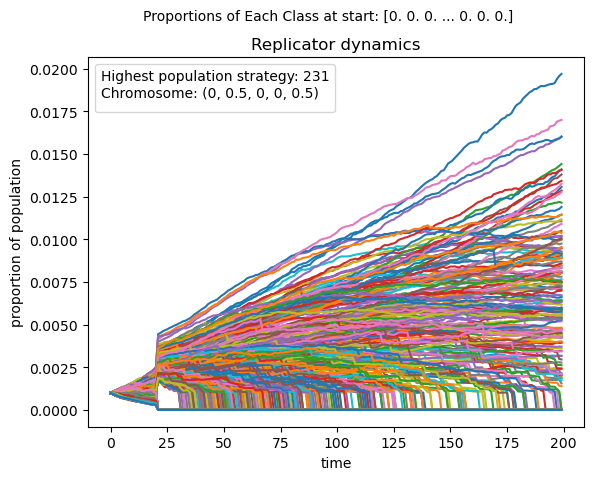

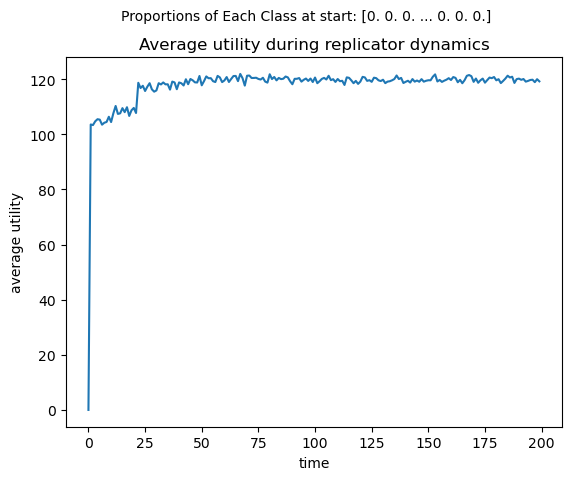

In [364]:
import matplotlib.pyplot as plt
# print evolution
fig, axes = plt.subplots(1,1)
timesteps_plot = np.arange(nr_timesteps)
for i in range(nr_of_strategies):
    axes.plot(timesteps_plot, population_proportions[i,:])#, label = "strategy " + str(strategies[i]))

# Identify the strategy with the highest population proportion in the last timestep
highest_population_strategy_idx = np.argmax(population_proportions[:, -1])
highest_population_strategy = strategies[highest_population_strategy_idx]
highest_population_chromosome = all_combinations[highest_population_strategy - 1]  # Adjust index if strategies start from 1

# plot replicator dynamics
legend_text = f"Highest population strategy: {highest_population_strategy}\nChromosome: {highest_population_chromosome}"
axes.legend(loc="upper left", title=legend_text)
axes.set_xlabel("time")
axes.set_ylabel("proportion of population")
#axes.legend(loc = "upper right")
axes.set_title("Replicator dynamics")
fig.suptitle("Proportions of Each Class at start: " + str(np.round(probabilities,2)), size = 10)
plt.show()
#plt.savefig("evolution_" + datetime.now().strftime("%m%d%Y_%H%M%S") + ".pdf", format="pdf", bbox_inches="tight")

# plot utility over time
fig, axes = plt.subplots(1,1)
axes.plot(timesteps_plot, average_utility_over_time)
axes.set_xlabel("time")
axes.set_ylabel("average utility")
axes.set_title("Average utility during replicator dynamics")
fig.suptitle("Proportions of Each Class at start: " + str(np.round(probabilities,2)), size= 10)
plt.show()
#plt.savefig("evolution_utility_tot.pdf", format="pdf", bbox_inches="tight")

# plot average utlity over time per strategy
# fig, axes = plt.subplots(1,1)
# for i in range(nr_of_strategies):
#     axes.plot(timesteps_plot, average_utility_per_strategy_over_time[i,:], label = "strategy " + str(strategies[i]))
# axes.set_xlabel("time")
# axes.set_ylabel("average utility")
# #axes.legend(loc = "upper right")
# axes.set_title("Average utility per strategy during Replicator dynamics")
# fig.suptitle("Proportions of Each Class at start: " + str(np.round(probabilities,2)), size = 10)
# plt.show()
# #plt.savefig("evolution_utility_per_strat.pdf", format="pdf", bbox_inches="tight")